In [28]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import pyvista as pv
import numpy as np

In [29]:
df = pl.read_csv('N.out')
df.head()

eta1,eta2,x1,x2,N1,N2,N3,N4
f64,f64,f64,f64,f64,f64,f64,f64
-1.0,-1.0,-2.0,0.0,1.0,0.0,0.0,0.0
-1.0,-0.959184,-1.979592,0.020408,0.979592,0.0,0.0,0.020408
-1.0,-0.918367,-1.959184,0.040816,0.959184,0.0,0.0,0.040816
-1.0,-0.877551,-1.938776,0.061224,0.938776,0.0,0.0,0.061224
-1.0,-0.836735,-1.918367,0.081633,0.918367,0.0,0.0,0.081633


In [30]:
global_coords = df.select(pl.col('eta1', 'eta2')).to_numpy()
global_coords = np.hstack([global_coords, np.zeros((global_coords.shape[0], 1))]) # Convert to pseudo-3D
test_elem = pv.PolyData(global_coords) # Create points on test element
test_elem.point_data['N1'] = df.select(pl.col('N1')).to_numpy()
test_elem.point_data['N2'] = df.select(pl.col('N2')).to_numpy()

In [31]:
plotter = pv.Plotter()
plotter.enable_2d_style()
plotter.add_mesh(test_elem, scalars='N2')
plotter.view_xy()
plotter.show()

Widget(value='<iframe src="http://localhost:63588/index.html?ui=P_0x18e0b325e20_4&reconnect=auto" class="pyvis…

In [32]:
df = pl.read_csv('k.out', has_header=False)

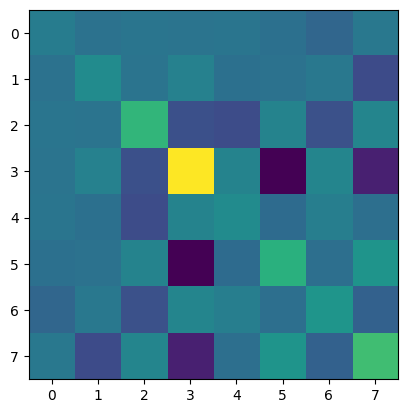

In [33]:
fig, ax = plt.subplots()
ax.imshow(df.to_numpy())